In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import (ModelSpec as MS, summarize, contrast)

In [2]:
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


<AxesSubplot:>

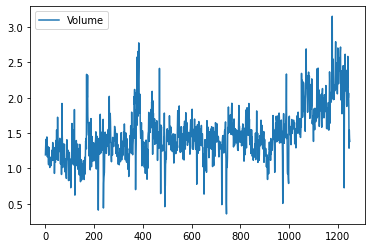

In [4]:
Smarket.plot(y='Volume')

In [5]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket['Direction'] == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Sat, 08 Feb 2025   Deviance:                       1727.6
Time:                        11:24:10   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [6]:
lr = sm.Logit(y, X)
results2 = lr.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                0.002074
Time:                        11:24:10   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [7]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [8]:
results.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

In [9]:
labels = np.array(['Down'] * Smarket.shape[0])
labels[results.predict() > 0.5] = 'Up'
labels

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [10]:
confusion_table(labels, Smarket['Direction'])

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [11]:
train = Smarket['Year'] < 2005
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

(252, 9)

In [12]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
lr_train = sm.Logit(y_train, X_train)
results = lr_train.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                0.001562
Time:                        11:24:10   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [13]:
labels = np.array(['Down'] * Smarket_test.shape[0])
labels[results.predict(exog=X_test) > 0.5] = 'Up'
labels[:10]

array(['Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up'],
      dtype='<U4')

In [14]:
confusion_table(labels, Smarket['Direction'].loc[~train])

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [15]:
X_test

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
998,1.0,-0.134,0.008,-0.007,0.715,-0.431,0.78690
999,1.0,-0.812,-0.134,0.008,-0.007,0.715,1.51080
1000,1.0,-1.167,-0.812,-0.134,0.008,-0.007,1.72100
1001,1.0,-0.363,-1.167,-0.812,-0.134,0.008,1.73890
1002,1.0,0.351,-0.363,-1.167,-0.812,-0.134,1.56910
...,...,...,...,...,...,...,...
1245,1.0,0.422,0.252,-0.024,-0.584,-0.285,1.88850
1246,1.0,0.043,0.422,0.252,-0.024,-0.584,1.28581
1247,1.0,-0.955,0.043,0.422,0.252,-0.024,1.54047
1248,1.0,0.130,-0.955,0.043,0.422,0.252,1.42236


In [16]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept']) for M in [X_train, X_test]]
lda.fit(X_train, y_train)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearDiscriminantAnalysis(store_covariance=True)

In [17]:
lda.means_.round(2)

array([[ 0.04,  0.03, -0.01, -0.01,  0.  ,  1.37],
       [-0.04, -0.03,  0.01,  0.  , -0.  ,  1.36]])

In [18]:
lda.classes_, lda.priors_

(array([False,  True]), array([0.49198397, 0.50801603]))

In [19]:
lda.scalings_

array([[-0.58081056],
       [-0.49111007],
       [ 0.07707664],
       [ 0.06904095],
       [-0.04549853],
       [-1.24678716]])

In [20]:
confusion_table(lda.predict(X_test), y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Truth,False,True
Predicted,,
False,77,97
True,34,44


In [21]:
lda.predict_proba(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[0.47182571, 0.52817429],
       [0.48435194, 0.51564806],
       [0.477387  , 0.522613  ],
       [0.48615594, 0.51384406],
       [0.50162585, 0.49837415],
       [0.49887592, 0.50112408],
       [0.49720147, 0.50279853],
       [0.49042844, 0.50957156],
       [0.49597267, 0.50402733],
       [0.48935917, 0.51064083],
       [0.48988143, 0.51011857],
       [0.51874278, 0.48125722],
       [0.49469513, 0.50530487],
       [0.47640837, 0.52359163],
       [0.48318554, 0.51681446],
       [0.48747609, 0.51252391],
       [0.50173959, 0.49826041],
       [0.51165336, 0.48834664],
       [0.50394267, 0.49605733],
       [0.49479808, 0.50520192],
       [0.50887675, 0.49112325],
       [0.52093447, 0.47906553],
       [0.50868867, 0.49131133],
       [0.49436411, 0.50563589],
       [0.51103185, 0.48896815],
       [0.50319608, 0.49680392],
       [0.4915523 , 0.5084477 ],
       [0.48319404, 0.51680596],
       [0.49267934, 0.50732066],
       [0.51308768, 0.48691232],
       [0.

In [22]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)
qda.means_, qda.priors_

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(array([[ 4.27902240e-02,  3.38940937e-02, -9.80651731e-03,
         -1.05987780e-02,  4.36659878e-03,  1.37184259e+00],
        [-3.95463511e-02, -3.13254438e-02,  5.83431953e-03,
          3.11045365e-03, -6.50887574e-04,  1.36320990e+00]]),
 array([0.49198397, 0.50801603]))

In [23]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806, -0.1161981 ,  0.02773081,  0.10375151,
         0.01264993],
       [-0.03924806,  1.53559498, -0.05837697,  0.00911436,  0.00535896,
        -0.02853927],
       [-0.1161981 , -0.05837697,  1.5261648 ,  0.02759497, -0.0866616 ,
        -0.02793508],
       [ 0.02773081,  0.00911436,  0.02759497,  1.60391547, -0.08697959,
        -0.03358478],
       [ 0.10375151,  0.00535896, -0.0866616 , -0.08697959,  1.44963901,
         0.00287333],
       [ 0.01264993, -0.02853927, -0.02793508, -0.03358478,  0.00287333,
         0.0758683 ]])

In [24]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Truth,False,True
Predicted,,
False,82,111
True,29,30


In [25]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB.classes_, NB.class_prior_

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(array([False,  True]), array([0.49198397, 0.50801603]))

In [26]:
NB.theta_, NB.var_

(array([[ 4.27902240e-02,  3.38940937e-02, -9.80651731e-03,
         -1.05987780e-02,  4.36659878e-03,  1.37184259e+00],
        [-3.95463511e-02, -3.13254438e-02,  5.83431953e-03,
          3.11045365e-03, -6.50887574e-04,  1.36320990e+00]]),
 array([[1.50355429, 1.53246749, 1.52305652, 1.60064884, 1.44668659,
         0.07571378],
        [1.51401364, 1.48732877, 1.51198994, 1.43804198, 1.63638575,
         0.06747517]]))

In [27]:
X_train[y_train == True].mean()

Lag1     -0.039546
Lag2     -0.031325
Lag3      0.005834
Lag4      0.003110
Lag5     -0.000651
Volume    1.363210
dtype: float64

In [28]:
NB.predict_proba(X_test)[:10]

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[0.52512367, 0.47487633],
       [0.46691112, 0.53308888],
       [0.48813902, 0.51186098],
       [0.50349077, 0.49650923],
       [0.50231369, 0.49768631],
       [0.4919971 , 0.5080029 ],
       [0.47215481, 0.52784519],
       [0.47692754, 0.52307246],
       [0.48771179, 0.51228821],
       [0.47844111, 0.52155889]])

In [29]:
X_train2 = X_train.loc[:, ['Lag1', 'Lag2']]
X_test2 = X_test.loc[:, ['Lag1', 'Lag2']]

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train2, y_train)
knn1_pred = knn1.predict(X_test2)
confusion_table(knn1_pred, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Truth,False,True
Predicted,,
False,43,58
True,68,83


In [31]:
Caravan = load_data('Caravan')
Purchase = Caravan['Purchase']

In [32]:
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [33]:
feature_df = Caravan.drop(columns=['Purchase'])
feature_df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [34]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, Purchase, test_size=1000, random_state=0)
scaler.fit(X_train)
X_train_std, X_test_std = scaler.transform(X_train), scaler.transform(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [36]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_std, y_train)
knn3_pred = knn3.predict(X_test_std)
confusion_table(knn3_pred, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Truth,No,Yes
Predicted,,
No,917,64
Yes,16,3


In [37]:
knn3.score(X_test_std, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.92

In [38]:
logreg = LogisticRegression(C=1, solver='liblinear')
logreg.fit(X_train_std, y_train)
logreg_pred = logreg.predict_proba(X_test_std)
logreg_labels = np.where(logreg_pred[:, 1] > 0.25, 'Yes', 'No')
confusion_table(logreg_labels, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Truth,No,Yes
Predicted,,
No,918,59
Yes,15,8


In [39]:
Bike = load_data('Bikeshare')
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [40]:
X = MS(['mnth', 'hr', 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
y = Bike['bikers']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:26:19   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                     -68.6317      5.307    -12.932      0.000     -79.035     -58.229
mnth[Feb]                       6.8452      4.287      1.597      0.110      -1.559      15.250
mnth[March]                    16.5514      4.301      3.848      0.000       8.120      24.983
mnth[April]                    41.4249      4.972      8.331      0.000      31.678      51.172
mnth[May]                      72.5571      5.641     12.862      0.000      61.499      83.615
mnth[June]                     67.8187      6.544     10.364      0.000      54.992      80.646
mnth[July]                     45.3245      7.081      6.401      0.000      31.444      59.205
mnth[Aug]                      53.2430      6.640      8.019      0.000      40.227      66.259
mnth[Sept]                     66.6783      5.925     11.254      0.000      55.064      78.293
mnth[Oct]                      75.8343      4.950     15.319      0.000      66.130      85.538
mnth[Nov]                      60.3100      4.610     13.083      0.000      51.273      69.347
mnth[Dec]                      46.4577      4.271     10.878      0.000      38.086      54.829
hr[1]                         -14.5793      5.699     -2.558      0.011     -25.750      -3.408
hr[2]                         -21.5791      5.733     -3.764      0.000     -32.817     -10.341
hr[3]                         -31.1408      5.778     -5.389      0.000     -42.468     -19.814
hr[4]                         -36.9075      5.802     -6.361      0.000     -48.281     -25.534
hr[5]                         -24.1355      5.737     -4.207      0.000     -35.381     -12.890
hr[6]                          20.5997      5.704      3.612      0.000       9.419      31.781
hr[7]                         120.0931      5.693     21.095      0.000     108.934     131.253
hr[8]                         223.6619      5.690     39.310      0.000     212.509     234.815
hr[9]                         120.5819      5.693     21.182      0.000     109.423     131.741
hr[10]                         83.8013      5.705     14.689      0.000      72.618      94.985
hr[11]                        105.4234      5.722     18.424      0.000      94.207     116.640
hr[12]                        137.2837      5.740     23.916      0.000     126.032     148.536
hr[13]                        136.0359      5.760     23.617      0.000     124.745     147.327
hr[14]                        126.6361      5.776     21.923      0.000     115.313     137.959
hr[15]                        132.0865      5.780     22.852      0.000     120.756     143.417
hr[16]                        178.5206      5.772     30.927      0.000     167.206     189.836
hr[17]                        296.2670      5.749     51.537      0.000     284.998     307.536
hr[18]     

In [51]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')
X2 = MS([mnth_encode, hr_encode, 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
y = Bike['bikers']
model2 = sm.OLS(y, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:36:59   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                      73.5974      5.132     14.340      0.000      63.537      83.658
mnth[Jan]                     -46.0871      4.085    -11.281      0.000     -54.096     -38.079
mnth[Feb]                     -39.2419      3.539    -11.088      0.000     -46.179     -32.304
mnth[March]                   -29.5357      3.155     -9.361      0.000     -35.721     -23.351
mnth[April]                    -4.6622      2.741     -1.701      0.089     -10.034       0.710
mnth[May]                      26.4700      2.851      9.285      0.000      20.882      32.058
mnth[June]                     21.7317      3.465      6.272      0.000      14.939      28.524
mnth[July]                     -0.7626      3.908     -0.195      0.845      -8.424       6.899
mnth[Aug]                       7.1560      3.535      2.024      0.043       0.227      14.085
mnth[Sept]                     20.5912      3.046      6.761      0.000      14.621      26.561
mnth[Oct]                      29.7472      2.700     11.019      0.000      24.455      35.039
mnth[Nov]                      14.2229      2.860      4.972      0.000       8.616      19.830
hr[0]                         -96.1420      3.955    -24.307      0.000    -103.895     -88.389
hr[1]                        -110.7213      3.966    -27.916      0.000    -118.496    -102.947
hr[2]                        -117.7212      4.016    -29.310      0.000    -125.594    -109.848
hr[3]                        -127.2828      4.081    -31.191      0.000    -135.282    -119.283
hr[4]                        -133.0495      4.117    -32.319      0.000    -141.119    -124.980
hr[5]                        -120.2775      4.037    -29.794      0.000    -128.191    -112.364
hr[6]                         -75.5424      3.992    -18.925      0.000     -83.367     -67.718
hr[7]                          23.9511      3.969      6.035      0.000      16.172      31.730
hr[8]                         127.5199      3.950     32.284      0.000     119.777     135.263
hr[9]                          24.4399      3.936      6.209      0.000      16.724      32.155
hr[10]                        -12.3407      3.936     -3.135      0.002     -20.056      -4.625
hr[11]                          9.2814      3.945      2.353      0.019       1.549      17.014
hr[12]                         41.1417      3.957     10.397      0.000      33.385      48.899
hr[13]                         39.8939      3.975     10.036      0.000      32.102      47.686
hr[14]                         30.4940      3.991      7.641      0.000      22.671      38.317
hr[15]                         35.9445      3.995      8.998      0.000      28.114      43.775
hr[16]                         82.3786      3.988     20.655      0.000      74.561      90.197
hr[17]     

In [52]:
model.fittedvalues, model2.fittedvalues, np.allclose(model.fittedvalues, model2.fittedvalues)

(0       -30.901456
 1       -48.624910
 2       -55.624782
 3       -62.042212
 4       -67.808961
            ...    
 8640    230.109717
 8641    169.403071
 8642    128.263439
 8643     96.688170
 8644     61.258905
 Length: 8645, dtype: float64,
 0       -30.901456
 1       -48.624910
 2       -55.624782
 3       -62.042212
 4       -67.808961
            ...    
 8640    230.109717
 8641    169.403071
 8642    128.263439
 8643     96.688170
 8644     61.258905
 Length: 8645, dtype: float64,
 True)

In [53]:
S2 = summarize(model2)
S2

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [54]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [55]:
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=['mnth[Dec]'])])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

In [56]:
model3 = sm.GLM(y, X2, family=sm.families.Poisson()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4054e+05
Date:                Sat, 08 Feb 2025   Deviance:                   2.2804e+05
Time:                        11:38:42   Pearson chi2:                 2.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       4.1182      0.006    683.963      0.000       4.106       4.130
mnth[Jan]                      -0.6702      0.006   -113.445      0.000      -0.682      -0.659
mnth[Feb]                      -0.4441      0.005    -91.379      0.000      -0.454      -0.435
mnth[March]                    -0.2937      0.004    -70.886      0.000      -0.302      -0.286
mnth[April]                     0.0215      0.003      6.888      0.000       0.015       0.028
mnth[May]                       0.2405      0.003     82.462      0.000       0.235       0.246
mnth[June]                      0.2232      0.004     62.818      0.000       0.216       0.230
mnth[July]                      0.1036      0.004     25.121      0.000       0.096       0.112
mnth[Aug]                       0.1512      0.004     41.281      0.000       0.144       0.158
mnth[Sept]                      0.2335      0.003     75.281      0.000       0.227       0.240
mnth[Oct]                       0.2676      0.003     96.091      0.000       0.262       0.273
mnth[Nov]                       0.1503      0.003     47.248      0.000       0.144       0.156
hr[0]                          -0.7544      0.008    -95.744      0.000      -0.770      -0.739
hr[1]                          -1.2260      0.010   -123.173      0.000      -1.245      -1.206
hr[2]                          -1.5631      0.012   -131.702      0.000      -1.586      -1.540
hr[3]                          -2.1983      0.016   -133.846      0.000      -2.230      -2.166
hr[4]                          -2.8305      0.023   -125.586      0.000      -2.875      -2.786
hr[5]                          -1.8147      0.013   -134.775      0.000      -1.841      -1.788
hr[6]                          -0.4299      0.007    -62.341      0.000      -0.443      -0.416
hr[7]                           0.5752      0.004    130.544      0.000       0.567       0.584
hr[8]                           1.0769      0.004    302.220      0.000       1.070       1.084
hr[9]                           0.5818      0.004    135.727      0.000       0.573       0.590
hr[10]                          0.3369      0.005     71.372      0.000       0.328       0.346
hr[11]                          0.4941      0.004    112.494      0.000       0.486       0.503
hr[12]                          0.6796      0.004    167.040      0.000       0.672       0.688
hr[13]                          0.6736      0.004    164.722      0.000       0.666       0.682
hr[14]                          0.6249      0.004    149.570      0.000       0.617       0.633
hr[15]                          0.6538      0.004    158.205      0.000       0.646       0.662
hr[16]                          0.8743      0.004    231.040      0.000       0.867       0.882
hr[17]     

In [57]:
S3 = summarize(model3)
S3

,coef,std err,z,P>|z|
intercept,4.1182,0.006,683.963,0.0
mnth[Jan],-0.6702,0.006,-113.445,0.0
mnth[Feb],-0.4441,0.005,-91.379,0.0
mnth[March],-0.2937,0.004,-70.886,0.0
mnth[April],0.0215,0.003,6.888,0.0
mnth[May],0.2405,0.003,82.462,0.0
mnth[June],0.2232,0.004,62.818,0.0
mnth[July],0.1036,0.004,25.121,0.0
mnth[Aug],0.1512,0.004,41.281,0.0
mnth[Sept],0.2335,0.003,75.281,0.0


In [58]:
coef_month2 = S3[S3.index.str.contains('mnth')]['coef']
coef_month2 = pd.concat([coef_month2, pd.Series([-coef_month2.sum()], index=['mnth[Dec]'])])
coef_month2

mnth[Jan]     -0.6702
mnth[Feb]     -0.4441
mnth[March]   -0.2937
mnth[April]    0.0215
mnth[May]      0.2405
mnth[June]     0.2232
mnth[July]     0.1036
mnth[Aug]      0.1512
mnth[Sept]     0.2335
mnth[Oct]      0.2676
mnth[Nov]      0.1503
mnth[Dec]      0.0166
dtype: float64

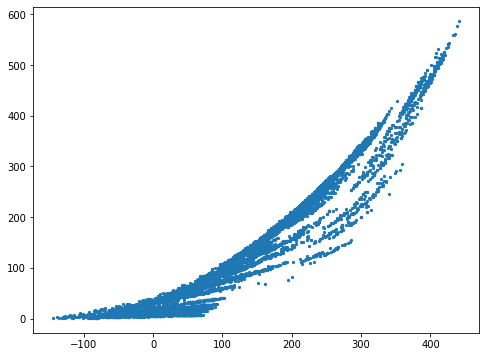

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(model2.fittedvalues, model3.fittedvalues, s=5)